In [39]:
f = open("labels.txt","r")  
lines = f.readlines()#读取全部内容  
f.close()
for i in range(0,len(lines),1):
    lines[i]=lines[i].replace('\n',"")
documents=lines

In [43]:
from gensim import corpora, models, similarities
from itertools import chain

# remove common words and tokenize
stoplist = set('for a of the to in i'.split())
texts = [[word for word in document.lower().split() if word not in stoplist]
         for document in documents]

# remove words that appear only once
all_tokens = sum(texts, [])
tokens_once = set(word for word in set(all_tokens) if all_tokens.count(word) == 1)
texts = [[word for word in text if word not in tokens_once] for text in texts]

# Create Dictionary.
id2word = corpora.Dictionary(texts)
# Creates the Bag of Word corpus.
mm = [id2word.doc2bow(text) for text in texts]

# Trains the LDA models.
lda = models.ldamodel.LdaModel(corpus=mm, id2word=id2word, num_topics=20, update_every=1, chunksize=10000, passes=1,minimum_probability=0)

# Prints the topics.
#for top in lda.print_topics():
#    print (top)
#print

# Assigns the topics to the documents in corpus
lda_corpus = lda[mm]

# Find the threshold, let's set the threshold to be 1/#clusters,
# To prove that the threshold is sane, we average the sum of all probabilities:
scores = list(chain(*[[score for topic_id,score in topic] for topic in [doc for doc in lda_corpus]]))
threshold = sum(scores)/len(scores)
print (threshold)
#print


0.05


In [89]:
cluster1 = [j for i,j in zip(lda_corpus,documents) if i[0][1] > threshold*15]
cluster2 = [j for i,j in zip(lda_corpus,documents) if i[1][1] > threshold*15]
cluster3 = [j for i,j in zip(lda_corpus,documents) if i[2][1] > threshold*15]
cluster4 = [j for i,j in zip(lda_corpus,documents) if i[3][1] > threshold*15]
cluster5 = [j for i,j in zip(lda_corpus,documents) if i[4][1] > threshold*15]
cluster6 = [j for i,j in zip(lda_corpus,documents) if i[5][1] > threshold*15]
cluster7 = [j for i,j in zip(lda_corpus,documents) if i[6][1] > threshold*15]
cluster8 = [j for i,j in zip(lda_corpus,documents) if i[7][1] > threshold*15]
cluster9 = [j for i,j in zip(lda_corpus,documents) if i[8][1] > threshold*15]
cluster10 = [j for i,j in zip(lda_corpus,documents) if i[9][1] > threshold*15]
cluster11 = [j for i,j in zip(lda_corpus,documents) if i[10][1] > threshold*15]
cluster12 = [j for i,j in zip(lda_corpus,documents) if i[11][1] > threshold*15]
cluster13 = [j for i,j in zip(lda_corpus,documents) if i[12][1] > threshold*15]
cluster14 = [j for i,j in zip(lda_corpus,documents) if i[13][1] > threshold*15]
cluster15 = [j for i,j in zip(lda_corpus,documents) if i[14][1] > threshold*15]
cluster16 = [j for i,j in zip(lda_corpus,documents) if i[15][1] > threshold*15]
cluster17 = [j for i,j in zip(lda_corpus,documents) if i[16][1] > threshold*15]
cluster18 = [j for i,j in zip(lda_corpus,documents) if i[17][1] > threshold*15]
cluster19 = [j for i,j in zip(lda_corpus,documents) if i[18][1] > threshold*15]
cluster20 = [j for i,j in zip(lda_corpus,documents) if i[19][1] > threshold*15]

In [174]:
#choose label to represent each cluster 
maxscore=0
for label in cluster10:
    temp=dict(lda[id2word.doc2bow(label.split(' '))])
    if(temp[0]>maxscore): 
        maxscore=temp[0]
        thelabel=label
print(thelabel)

store pretty nasty


In [67]:
lda[id2word.doc2bow(['pommes','oder','sonst','etwas'])]

[(0, 0.80999999921144361),
 (1, 0.010000000000000004),
 (2, 0.010000000000000004),
 (3, 0.010000000000032455),
 (4, 0.010000000083521783),
 (5, 0.010000000648630351),
 (6, 0.010000000000000004),
 (7, 0.010000000000000004),
 (8, 0.010000000000534441),
 (9, 0.010000000000000004),
 (10, 0.010000000005415543),
 (11, 0.010000000000062091),
 (12, 0.010000000001048528),
 (13, 0.010000000000000004),
 (14, 0.010000000000046406),
 (15, 0.010000000000000004),
 (16, 0.010000000022661749),
 (17, 0.010000000000834662),
 (18, 0.010000000025113929),
 (19, 0.01000000000065468)]

In [173]:
cluster10.remove('staff just pathetic')

In [130]:
print(cluster6)

['several video games', 'time more manageable', 'many specialty places', 'visit probably last', 'der kasse nur warten', 'viel zeit damit kunden', 'besucht wie der hier', 'lowest common denominator jobs', 'loud and obnoxious person', 'disney land prices', 'meist viele kunden messe', 'gerade diese filiale muss', 'different mcdonald experiences', 'loud personal conversations', 'entire last week', 'loud rap music', "c'est un fast-food", 'different mcdonald location', 'certain mcdonald standards', 'recorded receipt time', 'wieso ich einen ich', 'many many mcdonald', 'visitor more nimble', "small down 'cause everything", 'ways now haze', 'many many chances', 'modern two-story mcdonald', 'coffee now superb', 'statement more offensive', 'punishment hardly fitting', 'non corporate location', 'standard mickey dee', 'more incompetent staff members', 'look more cozy', 'standard mcd faire', 'newer location design', 'lowest common denominator', 'personal quatschend hinter', 'modern unique look', 'ma

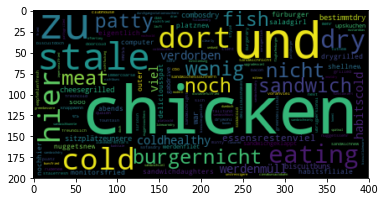

In [143]:
from wordcloud import WordCloud
str1 = ''.join(cluster7)
wordcloud = WordCloud().generate(str1)
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()